### Importing All the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore') 

### Importing the prebuilt dataset

In [2]:
train_data = pd.read_csv('../dataset/train_digits_data.csv')
test_data  = pd.read_csv('../dataset/test_digits_data.csv')

### Viewing the dataset

In [3]:
train_data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0


In [4]:
test_data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0


### Dividing the data into Features and label

In [5]:
charset = {
                'digit_0' : 0,
                'digit_1' : 1,
                'digit_2' : 2,
                'digit_3' : 3,
                'digit_4' : 4,
                'digit_5' : 5,
                'digit_6' : 6,
                'digit_7' : 7,
                'digit_8' : 8,
                'digit_9' : 9,
}

In [6]:
# X_train = np.array(train_data.iloc[:,:-1]).reshape((-1,1))
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1].replace(charset)
y_train = np.array(y_train).reshape((-1,1))

In [7]:
# X_test = np.array(test_data.iloc[:,:-1]).reshape((-1,1))
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:, -1].replace(charset)
y_test = np.array(y_test).reshape((-1,1))

### Plotting the array as an image

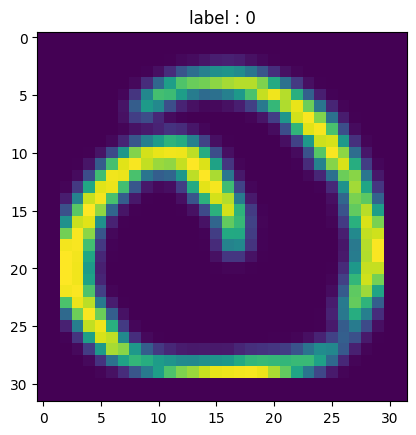

In [8]:
plt.title("label : 0")
plt.imshow(np.array(train_data.iloc[0].values[0:-1]).reshape(32,32).astype(int))
plt.show()

### Converting the labels into Nepali Characters

### Initializing Multilayer Perceptron Classifier as a base model 
Hidden layers = 2 (32,32 each) <br>
activation function = 'relu' <br>
random_state = 42 (For reproducibility) <br>
max iterations = 4000 <br>
tolerance = 0.5<br>

In [9]:
model = MLPClassifier(hidden_layer_sizes=(32,32), activation= 'relu', random_state= 42, max_iter= 4000, tol= .5)

### Model Fitting

In [10]:
import pickle
model.fit(X_train, y_train)
pickle.dump(model, open('basemodel.pkl', 'wb'))

MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=4000, random_state=42,
              tol=0.5)

### Checking the training Score

In [11]:
train_score = model.score(X_train, y_train)
print(f"The accuracy for Test dataset { train_score * 100} % ")

The accuracy for Test dataset 89.98235294117647 % 


### Checking the test Score

In [142]:
print(f"The accuracy for Test dataset {model.score(X_test, y_test) * 100} % ")

The accuracy for Test dataset 87.5 % 


predicted label:3


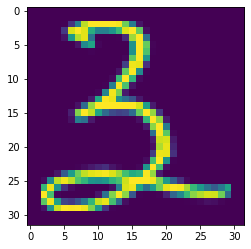

In [143]:
y_6000 =  model.predict(train_data.iloc[6000].values[0:-1].reshape(1, -1))
print(f'predicted label:{y_6000[0]}')
plt.imshow(np.array(train_data.iloc[6000].values[0:-1]).reshape(32,32).astype(int))
plt.show()

#### Neural Network From scratch

In [134]:
# class DigitClassifier:
#     def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_scale=0.01):
#         self.weights_input_to_hidden1 = weight_scale * np.random.randn(input_size, hidden_size1)
#         self.biases_input_to_hidden1 = np.zeros(hidden_size1)
#         self.weights_hidden1_to_hidden2 = weight_scale * np.random.randn(hidden_size1, hidden_size2)
#         self.biases_hidden1_to_hidden2 = np.zeros(hidden_size2)
#         self.weights_hidden2_to_output = weight_scale * np.random.randn(hidden_size2, output_size)
#         self.biases_hidden2_to_output = np.zeros(output_size)
        
#     def relu(self, x):
#         return np.maximum(0, x)
    
#     def forward_pass(self, X):
#         hidden1_inputs = np.dot(X, self.weights_input_to_hidden1) + self.biases_input_to_hidden1
#         hidden1_outputs = self.relu(hidden1_inputs)
#         # print(f'Shape of hidden output { hidden1_outputs.shape } ')
#         hidden2_inputs = np.dot(hidden1_outputs, self.weights_hidden1_to_hidden2) + self.biases_hidden1_to_hidden2
#         hidden2_outputs = self.relu(hidden2_inputs)
#         # print(f'Shape of hidden output { hidden2_outputs.shape } ')
        
#         final_inputs = np.dot(hidden2_outputs, self.weights_hidden2_to_output) + self.biases_hidden2_to_output
#         final_outputs = self.relu(final_inputs)
#         # print(f'Shape of hidden output { final_outputs.shape } ')
        
#         return final_outputs
    
#     def backward_pass(self, X, y, outputs, learning_rate=0.1):
#         # print(f'The shape of y is {y.shape}')
#         # print(f'The shape of y is {outputs.shape}')
#         error = y - outputs
#         output_error_term = error * (outputs > 0)
#         hidden2_error = np.dot(output_error_term, self.weights_hidden2_to_output.T)
#         # hidden2_error_term = hidden2
#     def train(self, X, y, num_iterations=1000, learning_rate=0.01):
#         for i in range(num_iterations):
#             outputs = self.forward_pass(X)
#             self.backward_pass(X, y, outputs, learning_rate)
#     def predict(self, X):
#         outputs = self.forward_pass(X)
#         return outputs


In [135]:
import numpy as np

class DigitClassifier
    def __init__(self, input_size, hidden_size, output_size, weight_scale=0.01):
        self.weights_input_to_hidden = weight_scale * np.random.randn(input_size, hidden_size)
        self.biases_input_to_hidden = np.zeros(hidden_size)
        self.weights_hidden_to_output = weight_scale * np.random.randn(hidden_size, output_size)
        self.biases_hidden_to_output = np.zeros(output_size)
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def forward_pass(self, X):
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) + self.biases_input_to_hidden
        hidden_outputs = self.relu(hidden_inputs)
        
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) + self.biases_hidden_to_output
        final_outputs = self.relu(final_inputs)
        
        return final_outputs
    
    def predict(self, X):
        outputs = self.forward_pass(X)
        return outputs
    
    def train(self, X, y, learning_rate=0.01, num_iterations=1000):
        for i in range(num_iterations):
            # Forward pass
            outputs = self.forward_pass(X)
            
            # Compute the loss
            loss = 0.5 * np.mean((outputs - y)**2)
            
            # Backward pass
            d_final_inputs = outputs - y
            d_final_outputs = d_final_inputs * (outputs > 0)
            
            d_hidden_outputs = np.dot(d_final_outputs, self.weights_hidden_to_output.T)
            d_hidden_inputs = d_hidden_outputs * (hidden_inputs > 0)
            
            # Update the weights and biases
            self.weights_hidden_to_output -= learning_rate * np.dot(hidden_outputs.T, d_final_outputs)
            self.biases_hidden_to_output -= learning_rate * np.sum(d_final_outputs, axis=0)
            
            self.weights_input_to_hidden -= learning_rate * np.dot(X.T, d_hidden_inputs)
            self.biases_input_to_hidden -= learning_rate * np.sum(d_hidden_inputs, axis=0)


In [136]:
# np.array(y_train)

In [137]:
# model_scratch = DigitClassifier(1024, 32, 10)
# model_scratch.train(X_train, y_train)

In [138]:
# pred = model_scratch.predict(X_test)